*Name: Vaidehi Anant Vatsaraj* <br>
*UID: 2018130060*

In [ ]:
# Importing the libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [ ]:
# Setting the color attributes
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# Loading the dataset
data = pd.read_csv("./horse.csv", sep=',', nrows=299)

In [ ]:
data = data.drop(columns=['hospital_number', 'nasogastric_reflux_ph','abdomo_appearance','abdomo_protein'])

print('Old Size: %d' % len(data))
data = data.dropna(how = 'any', axis = 'rows')
print('New Size: %d' % len(data))

print('Check that there are no empty values after cleaning:')
is_null = pd.isnull(data).sum()
print(is_null)
data.corr()

data2 = pd.get_dummies(data, columns =['surgery','age','capillary_refill_time','surgical_lesion', 'cp_data','abdominal_distention','temp_of_extremities', 'peripheral_pulse','mucous_membrane','pain','peristalsis', 'nasogastric_reflux','nasogastric_tube','rectal_exam_feces','abdomen'])
data2.head()
data2 = data2.replace({'outcome': {'lived': 1, 'died': 0, 'euthanized': np.nan}})
data2 = data2.dropna(how = 'any', axis = 'rows')

Old Size: 299
New Size: 52
Check that there are no empty values after cleaning:
surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64


In [ ]:
# Handling null values (Data Preprocessing)
# Check if null values are present
is_null = pd.isnull(data).sum()
print('Empty values num:')
print(is_null)

Empty values num:
surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64


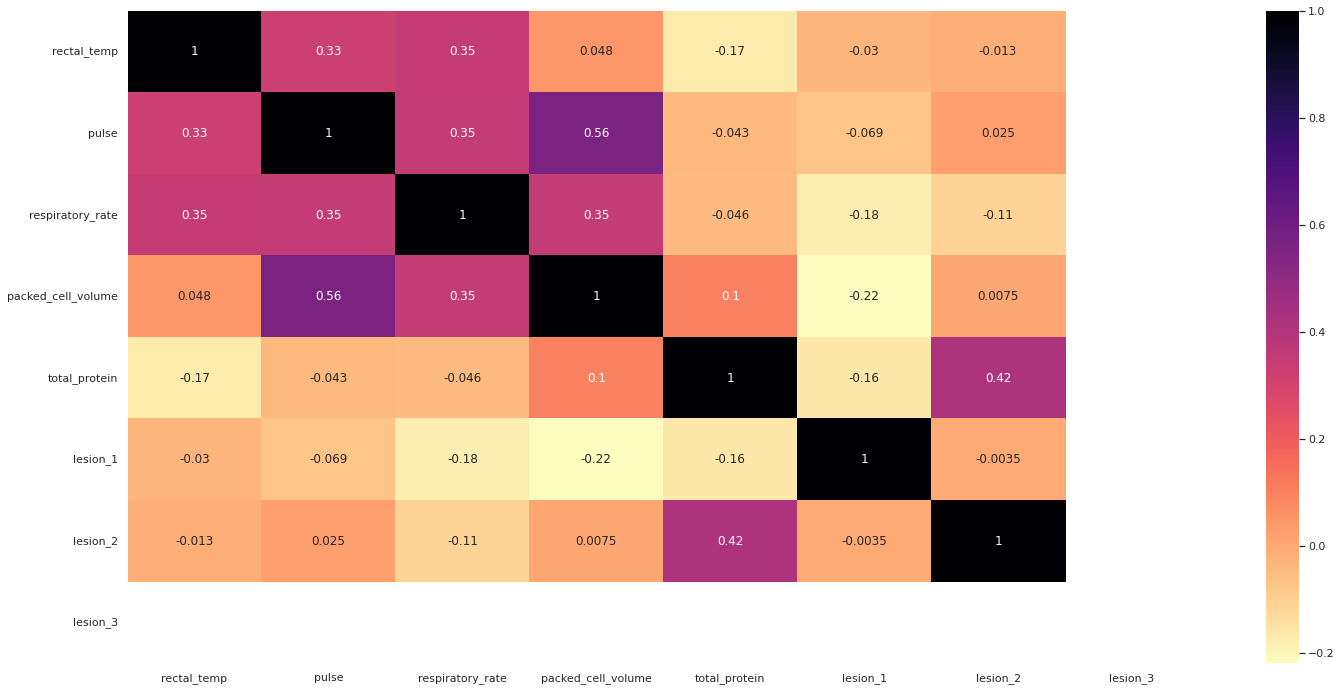

In [ ]:
# Plot correlation to select best features
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),cmap='magma_r',annot=True)

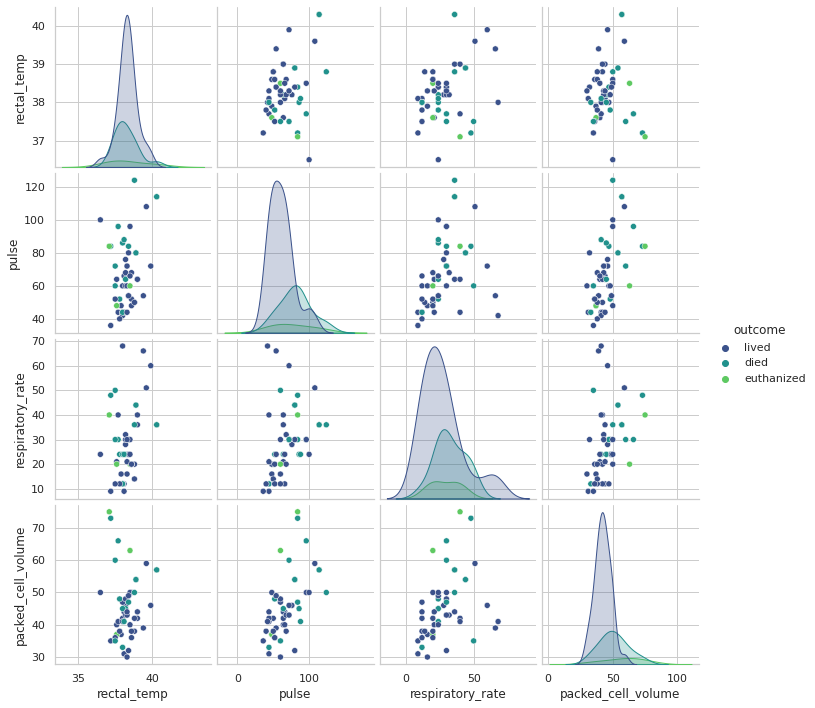

In [ ]:
# Exploratory data analysis (Select features and plot them on a series) 
cols = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'outcome']
sns.pairplot(data[cols], hue='outcome', palette = 'viridis');

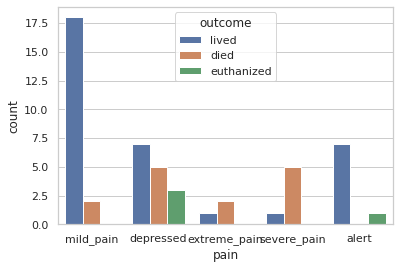

In [ ]:
# Plot of outcome vs pain levels
sns.countplot(data=data, x='pain', hue = 'outcome')

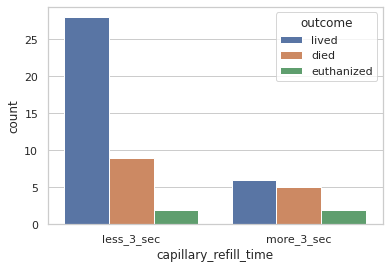

In [ ]:
# Plot of outcome vs capillary_refill_time
sns.countplot(data=data, x='capillary_refill_time', hue = 'outcome') 

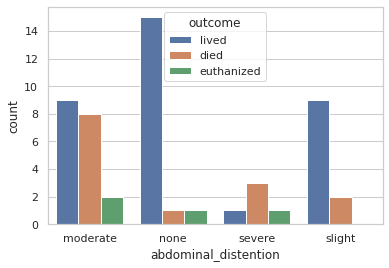

In [ ]:
# Plot of outcome vs abdominal_distention
sns.countplot(data=data, x='abdominal_distention', hue = 'outcome')

In [ ]:
# Select the features based on correlation
Selected_features = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'surgery_no', 'surgery_yes', 'age_adult','age_young','abdominal_distention_moderate', 'abdominal_distention_none','abdominal_distention_severe','abdominal_distention_slight', 'peripheral_pulse_increased','peripheral_pulse_normal','peripheral_pulse_reduced']

# Divide the dataset into dependent and independent variables 
X = data2[Selected_features]
y = data2['outcome']
# Split the datasets into train and test data with testing data as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
# Import the modules needed for model building 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Define logistic regression model
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
clf = clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
# Prediction
print(f"Prediction: {Y_pred}")
# Calculate the score
log_regr_score1 = clf.score(X_test, y_test)
print('Logistic Regression Score: ', round(log_regr_score1, 3))
# Evaluate the model using parameters such as precision, recall, f1-score, support
print(classification_report(y_test,Y_pred))

Prediction: [0. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
Logistic Regression Score:  0.7
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.70      0.82        10

    accuracy                           0.70        10
   macro avg       0.50      0.35      0.41        10
weighted avg       1.00      0.70      0.82        10



In [ ]:
# Tuning the parameters for logistic regresion
lr = LogisticRegression(random_state=0)
param_grid={"C":np.logspace(-3,3,10)}
grid = GridSearchCV(lr, param_grid, cv=5, verbose=0)
grid_search=grid.fit(X_train, y_train)
print('The best value found for the hyperparameter C is ' + str(grid_search.best_params_['C']))
print('Accuracy obtained after tuning the parameters: ' + str(grid_search.best_score_))
# Make prediction using the best parameters found in the grid search cv
y_pred = grid_search.predict(X_test)

The best value found for the hyperparameter C is 0.004641588833612777
Accuracy obtained after tuning the parameters: 0.8464285714285715
